In [1]:
import pandas as pd

In [7]:
data = pd.read_csv("../data/raw/drugsComTrain_raw.tsv", sep="\t").drop("Unnamed: 0", axis=1)
test = pd.read_csv("../data/raw/drugsComTest_raw.tsv", sep="\t").drop("Unnamed: 0", axis=1)

In [8]:
data['review'] = data['review'].str.replace('&#039;',"'",)
data['review'] = data['review'].str.replace('"',"")
test['review'] = test['review'].str.replace('&#039;',"'",)
test['review'] = test['review'].str.replace('"',"")

In [10]:
data = data[data['condition'].str.contains("users found this comment helpful") == False]
test = test[test['condition'].str.contains("users found this comment helpful") == False]

In [11]:
data.to_csv("../data/drugs_train.csv", index=False)
test.to_csv("../data/drugs_test.csv", index=False)

In [2]:
data_ = pd.read_csv("../data/drugs_train.csv")
data_test = pd.read_csv("../data/drugs_test.csv")

# ML

In [3]:
import time
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



<AxesSubplot:>

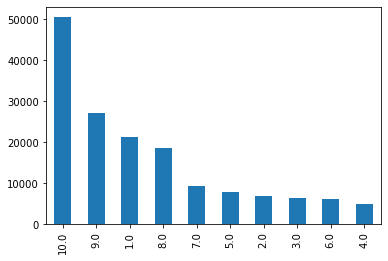

In [4]:
data_["rating"].value_counts().plot.bar()

In [5]:
x = data_['review']
y = data_['rating']
x_test = data_test['review']
y_test = data_test['rating']

In [14]:
# Feature extractors.
feature_extractors = [
# CountVectorizer(),
# TfidfVectorizer(),
# Ignore words that appear in less than 20% of posts (rare words).
# CountVectorizer(min_df=0.2),
# Ignore words that appear in more than 80% of posts (frequent words).
# CountVectorizer(max_df=0.8),
# CountVectorizer(ngram_range=(2, 2)),
# CountVectorizer(ngram_range=(3, 3)),
# TfidfVectorizer(min_df=0.2),
# TfidfVectorizer(max_df=0.8),
TfidfVectorizer(ngram_range=(1,2), max_features=100),
# TfidfVectorizer(ngram_range=(3, 3))
]

# Classifiers.
classifiers = [ 
# LinearSVC(max_iter=1000), 
# LogisticRegression(max_iter=1000),
# KNeighborsClassifier(),
RandomForestClassifier(n_jobs=-1),
# DecisionTreeClassifier()
]

In [15]:
cv = StratifiedKFold(n_splits=5)

scoring = {
'f1_score': make_scorer(f1_score, average='weighted')
}

In [16]:
def start_ML_pipeline():
   for classifier in classifiers:
      for extractor in feature_extractors:
         start_time = time.time()
         pipeline = Pipeline([('extractor', extractor), ('classifier', classifier)])
         scores = cross_validate(pipeline, x, y, cv=cv, scoring=scoring)
         end_time = time.time()
         total_time = round((end_time - start_time)/60, 2)


         f1_score = round(np.mean(scores['test_f1_score']), 2)

         print("Time: ", total_time, " min")
         print("Experiment: ", str(classifier), "+", str(extractor))
         print("F1 score= ", f1_score, ", 5-fold CV=", scores['test_f1_score'])
         print("="*100)

## Simple ML Approach


In [22]:
pipeline2 = Pipeline([('extractor', TfidfVectorizer(ngram_range=(1,2), max_features=100),), ('classifier', RandomForestClassifier(n_jobs=-1),)])
pipeline2.fit(x, y)

Pipeline(steps=[('extractor',
                 TfidfVectorizer(max_features=100, ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier(n_jobs=-1))])

In [23]:
y_pred = pipeline.predict(x)
print(classification_report(y, y_pred))
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96     21391
         2.0       0.99      0.95      0.97      6833
         3.0       0.99      0.96      0.97      6422
         4.0       0.99      0.95      0.97      4942
         5.0       0.99      0.96      0.98      7907
         6.0       0.99      0.95      0.97      6254
         7.0       0.99      0.95      0.97      9338
         8.0       0.99      0.95      0.97     18688
         9.0       0.98      0.95      0.97     27219
        10.0       0.93      0.99      0.96     50504

    accuracy                           0.97    159498
   macro avg       0.98      0.96      0.97    159498
weighted avg       0.97      0.97      0.97    159498

              precision    recall  f1-score   support

         1.0       0.67      0.72      0.69      7230
         2.0       0.95      0.61      0.75      2308
         3.0       0.97      0.60      0.74      2185
         4.0       0.97 